# Case Study Introduction to Data Analytic RevouID
<hr>

## Dibuat oleh

<a href="https://id.linkedin.com/in/iamdamar" target="_blank">Damar Djati Wahyu Kemala</a>

## Dataset

Source : RevouID - NYCAirbnb data

## Case Study Instructions

*   Melihat Data dan kemudian berfikir untuk menampilkan 3 trends/points yang ingin kamu tampilkan dari data tersebut.
*   Ekplorasi data dengan membuat perubahan serta filter pada data, dan lakukan data preparation and cleaning
*   Buat Visualisasi dari Data



## Connect to SQL SERVER

### Data cleaning sepenuhnya dilakukan di SQL Server

In [6]:
# Connect with SQL Server

import sqlalchemy, urllib
from sqlalchemy.engine import URL

connection_string = "DRIVER={SQL Server};SERVER=DAMARS-PC\SQLEXPRESS;DATABASE=Airbnb;"
connection_str_quoted = urllib.parse.quote_plus(connection_string)
connection_uri = 'mssql+pyodbc:///?odbc_connect={}'.format(connection_str_quoted)

conn = sqlalchemy.create_engine(connection_uri)
print("Terkoneksi ke Server")

# conn.dispose()

Terkoneksi ke Server


## Close Connection

In [5]:
conn.dispose()
print("Connection closed")

Connection closed


## Query Data dan dimasukan ke Pandas Dataframe

In [7]:
# Import Pandas
# using conn2 second connection from SQL SERVER
import pandas as pd

query_data = 'SELECT * FROM nyc_airbnb'
df = pd.read_sql(query_data, conn)
df.head()

,listing_id,room_type,host_name,last_review,neighborhood_county_group,neighborhood,price_dollar
0,32807364.0,private room,Karan,38493.0,Brooklyn,Bedford-Stuyvesant,76
1,32808737.0,entire home/apt,Sonder (NYC),37793.0,Manhattan,Murray Hill,231
2,32808795.0,entire home/apt,Ben,38159.0,Manhattan,West Village,300
3,32808836.0,private room,Xian,38493.0,Bronx,Williamsbridge,140
4,32809387.0,entire home/apt,Lauren,45098.0,Queens,Arverne,300


### Import Library untuk Visualisasi Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate

## Data-Visualization NYC AirBnb

### Pemesan Kamar terbanyak di NYC-Airbnb

In [16]:
top_host = df['host_name'].value_counts().head(10)

print(tabulate([[top_host]], headers=['Top Host'], tablefmt='orgtbl'))

| Top Host                      |
|-------------------------------|
| Michael         207           |
| Sonder (NYC)    207           |
| David           195           |
| John            177           |
| Alex            151           |
| Maria           122           |
| Melissa         110           |
| Anna            101           |
| Daniel          101           |
| Chris            92           |
| Name: host_name, dtype: int64 |


In [17]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)


In [20]:
print(tabulate([[top_host_df]]))

--------------------------
index  host_name
0       Michael        207
1  Sonder (NYC)        207
2         David        195
3          John        177
4          Alex        151
5         Maria        122
6       Melissa        110
7          Anna        101
8        Daniel        101
9         Chris         92
--------------------------


In [31]:
top_host_df.rename(columns={'index':'Host_Name', 'host_name':'Hst_Count'}, inplace=True)

print(tabulate([[top_host_df['Host_Name'].to_string(index=False), top_host_df['Hst_Count'].to_string(index=False)]], 
               headers=['Host Name', 'Hst_Count'], 
               tablefmt='orgtbl'))

| Host Name    | Hst_Count   |
|--------------+-------------|
| Michael      | 207         |
| Sonder (NYC) | 207         |
|        David | 195         |
|         John | 177         |
|         Alex | 151         |
|        Maria | 122         |
|      Melissa | 110         |
|         Anna | 101         |
|       Daniel | 101         |
|        Chris |  92         |


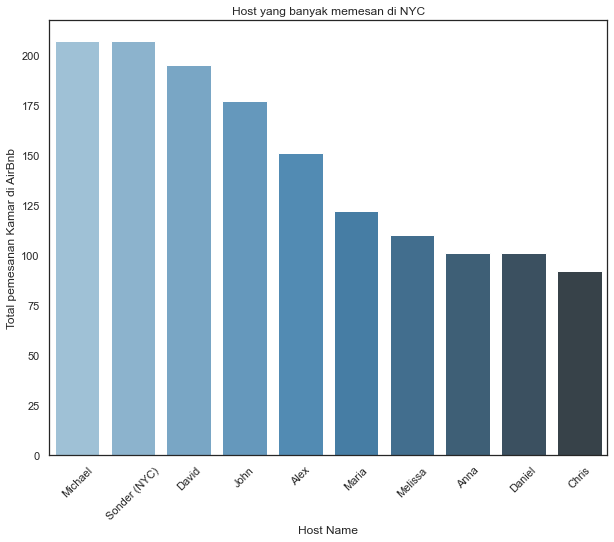

In [33]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

vis_host=sns.barplot(x="Host_Name", y="Hst_Count", data=top_host_df,
                 palette='Blues_d')
vis_host.set_title('Host yang banyak memesan di NYC')
vis_host.set_ylabel('Total pemesanan Kamar di AirBnb')
vis_host.set_xlabel('Host Name')
vis_host.set_xticklabels(vis_host.get_xticklabels(), rotation=45)
plt.show()

Host dari grafik yang paling banyak memesan kamar adalah `Michael` dan `Sonder (NYC)`dengan total pemesanan kamar diatas **200**

### Persentase banyak kamar yang ada di masing-masing wilayah di New York

In [34]:
print(tabulate([[df['neighborhood_county_group'].value_counts(normalize=True)*100]], headers=['Persentase Banyak Kamar di wilayah new york'], tablefmt='orgtbl'))

| Persentase Banyak Kamar di wilayah new york     |
|-------------------------------------------------|
| Brooklyn         41.533661                      |
| Manhattan        40.969639                      |
| Queens           13.692548                      |
| Bronx             2.744110                      |
| Staten Island     1.060042                      |
| Name: neighborhood_county_group, dtype: float64 |


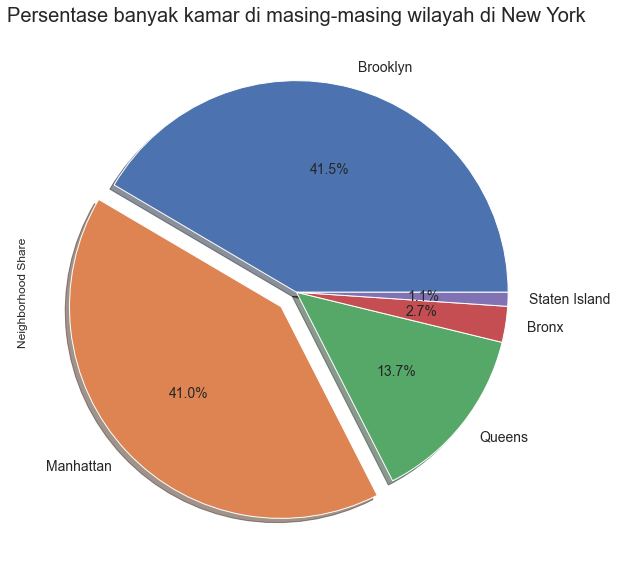

In [45]:
f, ax = plt.subplots(1,1,figsize=(12,8))
df['neighborhood_county_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],
                                                        autopct='%1.1f%%',
                                                        shadow=True,
                                                        textprops={'fontsize': 14})
ax.set_title('Persentase banyak kamar di masing-masing wilayah di New York', fontsize=20)
ax.set_ylabel('Neighborhood Share')
plt.tight_layout()
plt.show()

Dapat dilihat bahwa tempat sewa kamar paling banyak dimiliki oleh AirBnb di New York berada di Manhattan dan brooklyn, dengan nilai persentase sebagai berikut:

| Wilayah di NYC | Persentase Banyak Kamar | 
| ----------------- | ------- |
| Brooklyn          | 41.5 % |
| Manhattan         | 40.9 % atau 41 % |

### Hubungan antara tipe kamar Airbnb yang ada dengan harga dimasing-masing wilayah di new york

| room_type  price_dollar neighborhood_county_group       |
| entire home/apt           300                 Manhattan |
| entire home/apt           300                    Queens |
| entire home/apt           290                 Manhattan |
| entire home/apt           231                 Manhattan |
|    private room           140                     Bronx |
|    private room            76                  Brooklyn |
| entire home/apt            65                    Queens |
|    private room            63                 Manhattan |
|    private room            59                  Brooklyn |
|    private room            40                  Brooklyn |



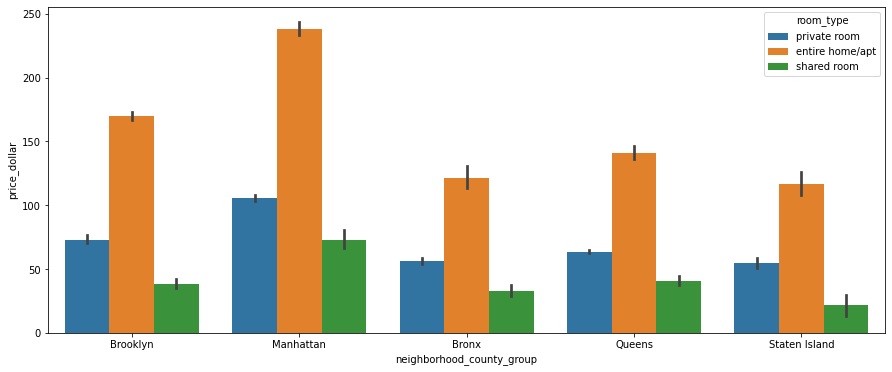

In [14]:
print(tabulate([[df[['room_type', 'price_dollar', 'neighborhood_county_group']].head(10).sort_values(['price_dollar'], ascending=[0]).to_string(index=False)]], tablefmt='orgtbl'))
print('')
plt.figure(figsize=(15, 6))
sns.barplot(x='neighborhood_county_group', y='price_dollar', hue='room_type' ,data=df)
plt.show()

Dilihat dari harga sewa kamar berdasarkan room_type dan Wilayah tempat sewa, 
- Manhattan merupakan wilayah di New York dengan nilai harga sewa kamar tertinggi, dengan tipe ruangan kamar entire home/apt, disusul dengan harga sewa tertinggi kedua dengan tipe ruangan kamar private room.
- State Island dan Bronx memiliki tingkat harga sewa kamar paling rendah dari Manhattan dan Brooklyn dengan harga tingkat sewa kamar 100 Dollar lebih sedikit.

- dari kelima wilayah di new york, tempat sewa kamar AirBnb dengan tingkat harga sewa paling rendah terletak pada tipe ruangan kamar shared room, dengan harga rata-rata dibawah 50 dollars.

### Jumlah kamar pada masing-masing tipe kamar

In [46]:
room_types = df['room_type'].head(10).to_string(index=False)
print(tabulate([[df['room_type'].value_counts()]], headers=['Count room type'], tablefmt='orgtbl'))

| Count room type               |
|-------------------------------|
| entire home/apt    13173      |
| private room       11247      |
| shared room          579      |
| Name: room_type, dtype: int64 |


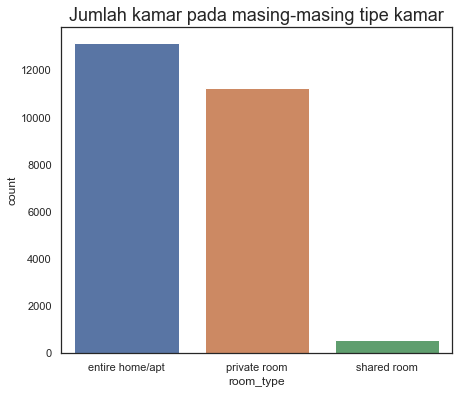

In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(7,6))
ax = sns.countplot('room_type',data=df,order=df['room_type'].value_counts().index)
ax.set_title('Jumlah kamar pada masing-masing tipe kamar', fontsize=18)
plt.show()

Dapat dilihat, kamar dengan tingkat sewa paling rendah di NYC AirBnb terletak pada `shared room` dengan nilai harga/price kisaran 0-2000.

Sehingga untuk melihat korelasi/hubungan antara sewa kamar dengan harga, perlu
mengambil harga dengan kisaran 0-400 dengan tujuan agar ketiga jenis ruangan dapat terlihat dengan jelas harganya.

### Melihat distribusi harga terhadap tipe kamar

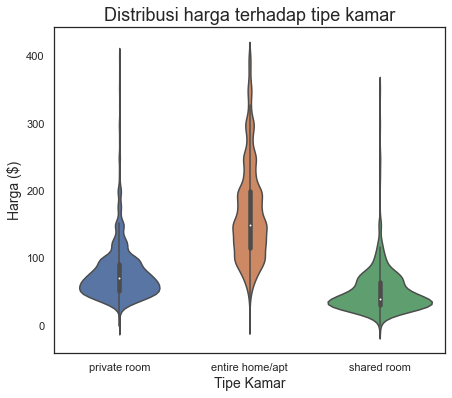

In [61]:
harga_w_tipekamar=df[df.price_dollar < 400]

plt.figure(figsize=(7,6))
vioplot_price=sns.violinplot(data=harga_w_tipekamar, x='room_type', y='price_dollar')
vioplot_price.set_title('Distribusi harga terhadap tipe kamar', fontsize=18)
plt.xlabel('Tipe Kamar', fontsize=14)
plt.ylabel('Harga ($)', fontsize=14)
plt.show()

Ternyata `harga sewa paling tinggi` terletak pada kamar dengan tipe ruangan `entire home/apt`

## Summary